# Proyek Analisis Data:
- Nama: Muh. Fa'iq Zhahirin
- Email: faiqzh@gmail.com
- Id Dicoding: faiqzh

#Menentukan Pertanyaan

- Stasiun apakah yang memiliki curah hujan paling tinggi?
- Bagaimanakah keadaan curah hujan dalam 12 bulan terakhir pada stasiun dengan curah  hujan paling tinggi?
- Bagaimana perbandingan tingkat polusi ketika hujan dan ketika tidak hujan pada stasiun dengan curah hujan tertinggi?

#Preparation

##Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


##Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Data Wrangling

###Gathering Data

In [ ]:
#Return name file as list inside the directory
dir_path="/content/gdrive/MyDrive/PROJECT/Dicoding/Data"
file_names = os.listdir(dir_path)
file_names

['PRSA_Data_Aotizhongxin_20130301-20170228.csv',
 'PRSA_Data_Changping_20130301-20170228.csv',
 'PRSA_Data_Dingling_20130301-20170228.csv',
 'PRSA_Data_Dongsi_20130301-20170228.csv',
 'PRSA_Data_Guanyuan_20130301-20170228.csv',
 'PRSA_Data_Gucheng_20130301-20170228.csv',
 'PRSA_Data_Huairou_20130301-20170228.csv',
 'PRSA_Data_Nongzhanguan_20130301-20170228.csv',
 'PRSA_Data_Shunyi_20130301-20170228.csv',
 'PRSA_Data_Tiantan_20130301-20170228.csv',
 'PRSA_Data_Wanliu_20130301-20170228.csv',
 'PRSA_Data_Wanshouxigong_20130301-20170228.csv']

In [ ]:
#Concatenating dataframe
df_list = []

for file in file_names:
  file_df = pd.read_csv(f'{dir_path}/{file}')
  df_list.append(file_df)

df= pd.concat(df_list, ignore_index=True,)
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


- PM2.5: Partikel udara yang berukuran lebih kecil dari 2.5 mikron (mikrometer).
- PM10: Partikel udara yang berukuran lebih kecil dari 10 mikron (mikrometer).
- Temp: Temperatur/Suhu udara
- WD: Wind Direction/Arah Angin
- WSPM: Wind Speed Per Minute
- PRES: Pressure

###Assesing Data

In [ ]:
# Identification Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


Year, Month, Day, Hour
Bukan berbentuk datetime

In [ ]:
#Sum na data
df.isna().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

###Cleaning Data

####Missing Value

In [ ]:
#Nilai untuk mengisi data yang kosong
values= {
    "PM2.5":df["PM2.5"].mean(),
    "PM10":df["PM10"].mean(),
    "SO2":df["SO2"].mean(),
    "NO2":df["NO2"].mean(),
    "CO":df["CO"].mean(),
    "O3":df["O3"].mean(),
    "TEMP":df["TEMP"].mean(),
    "PRES":df["PRES"].mean(),
    "DEWP":df["DEWP"].mean(),
    "WSPM":df["WSPM"].mean(),
    "RAIN":df["RAIN"].mean()
    }

In [ ]:
df.fillna(value=values, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,79.978679,91.066422,21.417257,34.618463,1131.283304,55.760484,11.430729,10.469162,13.787240,0.820624,1.245914
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


####Outliers

In [ ]:
def Quartile1(dframe,column):
  Q1 = dframe[column].quantile(0.25)
  return Q1


def Quartile3(dframe,column):
  Q3 = dframe[column].quantile(0.75)
  return Q3

def masking(dframe,column,):
  Q3 = Quartile3(dframe,column)
  Q1 = Quartile1(dframe,column)
  IQR = Q3-Q1
  maximum = Q3 + (1.5*IQR)
  minimum = Q1 - (1.5*IQR)
  # return [Q3,Q1,IQR,maximum,minimum]
  kondisi_lower_than = dframe[column] < minimum
  kondisi_more_than = dframe[column] > maximum
  dframe.drop(dframe[kondisi_lower_than].index, inplace=True)
  dframe.drop(dframe[kondisi_more_than].index, inplace=True)

In [ ]:
#Polution List
pollutant = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO']

In [ ]:
for pol in pollutant:
  masking(df,pol)


In [ ]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,72.0,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,50.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong


In [ ]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,338445.000000,338445.00000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000
mean,17928.301107,2014.69879,6.628040,15.835879,11.477502,54.826649,76.475242,9.034655,40.574487,842.395245,64.257091,15.270692,1009.802906,3.584856,0.074920,1.833749
std,10004.628542,1.17239,3.184478,8.799723,6.882278,47.074398,56.079292,8.667228,25.147907,488.318161,55.906908,11.185302,10.641950,14.311224,0.880961,1.287451
min,1.000000,2013.00000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,9911.000000,2014.00000,4.000000,8.000000,6.000000,16.000000,29.000000,2.000000,20.000000,400.000000,23.000000,5.900000,1001.200000,-8.900000,0.000000,1.000000
50%,18563.000000,2015.00000,7.000000,16.000000,11.000000,42.000000,65.000000,5.426400,37.000000,800.000000,55.906200,17.300000,1008.700000,6.000000,0.000000,1.500000
75%,26887.000000,2016.00000,9.000000,23.000000,17.000000,79.793428,110.000000,13.000000,56.000000,1200.000000,87.000000,24.400000,1018.100000,16.300000,0.000000,2.400000
max,35064.000000,2017.00000,12.000000,31.000000,23.000000,241.000000,279.000000,39.412800,118.458100,2300.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,12.000000


###Datetime Object

In [ ]:
#Convert string to datetime obj
df["datetime"]=pd.to_datetime(pd.DataFrame(
    {
     "year":df["year"],
     "month":df["month"],
     "day":df["day"],
     "hour":df["hour"]
    }
))

In [ ]:
df = df.drop(["No","year","month","day","hour"], axis=1)
df.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


#Exploratory Data Analysis

##Data Summary

In [ ]:
df.sample(5)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
89555,9.0,117.0,2.0,2.0,100.0,95.0,24.700000,998.3,-6.6,0.0,NW,4.8,Dingling,2015-05-19 11:00:00
91925,7.0,9.0,4.0,5.0,400.0,42.0,20.700000,1001.1,16.7,0.0,N,1.3,Dingling,2015-08-26 05:00:00
209176,47.0,57.0,9.0,36.0,1100.0,44.0,2.466667,1013.0,-11.5,0.0,SW,5.5,Gucheng,2017-01-09 16:00:00
410524,42.0,42.0,18.0,47.0,900.0,28.0,-1.800000,1023.9,-5.5,0.0,WNW,0.8,Wanshouxigong,2015-12-30 04:00:00
37000,51.0,234.0,14.0,22.0,400.0,162.0,27.300000,988.0,0.9,0.0,SSW,3.8,Changping,2013-05-20 16:00:00


In [ ]:
df.describe(include="all",datetime_is_numeric=True)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,338445.000000,337126,338445.000000,338445,338445
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dingling,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32874,NaN,30806,NaN
mean,54.826649,76.475242,9.034655,40.574487,842.395245,64.257091,15.270692,1009.802906,3.584856,0.074920,NaN,1.833749,NaN,2015-03-17 23:18:03.983512320
min,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,16.000000,29.000000,2.000000,20.000000,400.000000,23.000000,5.900000,1001.200000,-8.900000,0.000000,NaN,1.000000,NaN,2014-04-17 22:00:00
50%,42.000000,65.000000,5.426400,37.000000,800.000000,55.906200,17.300000,1008.700000,6.000000,0.000000,NaN,1.500000,NaN,2015-04-13 10:00:00
75%,79.793428,110.000000,13.000000,56.000000,1200.000000,87.000000,24.400000,1018.100000,16.300000,0.000000,NaN,2.400000,NaN,2016-03-25 06:00:00
max,241.000000,279.000000,39.412800,118.458100,2300.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,12.000000,NaN,2017-02-28 23:00:00


##Mean

In [ ]:
mean = df.groupby(by="station").mean(numeric_only=True)
mean

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,55.203620,78.026705,9.743236,47.403753,824.044115,64.850981,15.486647,1010.929475,4.219325,0.080769,1.830181
Changping,51.206279,71.961878,8.648713,36.420958,810.855906,64.246938,15.495988,1006.711641,2.894615,0.068912,1.945517
Dingling,50.088479,66.597153,8.200585,22.775036,705.725599,72.414110,14.729057,1007.162729,2.229098,0.066043,1.909512
Dongsi,56.793270,77.517689,10.371386,43.659846,913.110615,63.899069,15.498445,1011.693716,3.407798,0.076977,1.993598
Guanyuan,56.871547,79.855919,9.546456,46.669200,864.842215,63.302356,15.503122,1010.902057,4.326142,0.079029,1.821473
Gucheng,57.217191,89.175711,8.390940,44.279477,877.879389,66.363782,15.961387,1007.708348,4.110668,0.076929,1.443182
Huairou,53.454996,72.645804,7.641490,27.768546,810.800046,63.005946,13.512801,1007.006601,3.073595,0.074121,1.700254
Nongzhanguan,54.506903,75.472880,9.944345,46.050932,855.310480,67.299175,15.676918,1011.587987,3.544069,0.076521,2.006473
Shunyi,56.220232,73.465263,8.160925,36.505659,827.074315,60.706859,14.944382,1012.245040,3.406531,0.068400,1.907059


##Correlation

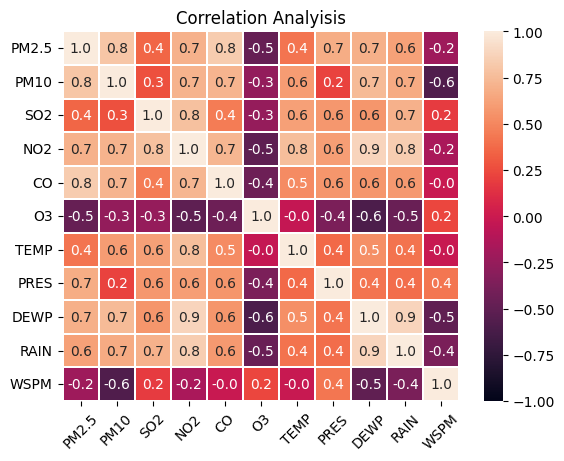

In [ ]:
sns.heatmap(
    mean.corr(),
    annot=True,
    fmt=".1f",
    linewidth=.2,
    vmin=-1,
    vmax=1
)
plt.title("Correlation Analyisis")
plt.xticks(rotation=45)
plt.show()

#Visulaization And Explanatory Analysis

##Stasiun apakah yang memiliki curah hujan paling tinggi dalam 12 bulan terakhir?

In [ ]:
month_filter = df["datetime"].max() - pd.DateOffset(months=12)
month_filter

Timestamp('2016-02-28 23:00:00')

In [ ]:
filtered_df = df[df["datetime"]>month_filter]
filtered_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
26280,8.0,12.0,4.0,16.0,300.0,64.000000,-2.3,1030.7,-19.7,0.0,NE,2.0,Aotizhongxin,2016-02-29 00:00:00
26281,9.0,13.0,4.0,19.0,400.0,60.000000,-3.3,1030.9,-19.7,0.0,ESE,1.4,Aotizhongxin,2016-02-29 01:00:00
26282,11.0,16.0,4.0,21.0,400.0,57.000000,-4.8,1030.9,-18.3,0.0,ENE,0.9,Aotizhongxin,2016-02-29 02:00:00
26283,11.0,13.0,4.0,17.0,400.0,61.000000,-5.3,1030.7,-18.4,0.0,E,0.9,Aotizhongxin,2016-02-29 03:00:00
26284,13.0,16.0,5.0,25.0,500.0,57.372271,-6.3,1030.8,-16.6,0.0,E,1.2,Aotizhongxin,2016-02-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,11.0,32.0,3.0,24.0,400.0,72.000000,12.5,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28 19:00:00
420764,13.0,32.0,3.0,41.0,500.0,50.000000,11.6,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28 20:00:00
420765,14.0,28.0,4.0,38.0,500.0,54.000000,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28 21:00:00
420766,12.0,23.0,4.0,30.0,400.0,59.000000,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28 22:00:00


In [ ]:
st_condition = filtered_df.groupby("station").mean(numeric_only=True).sort_values(by=["RAIN"], ascending=False)

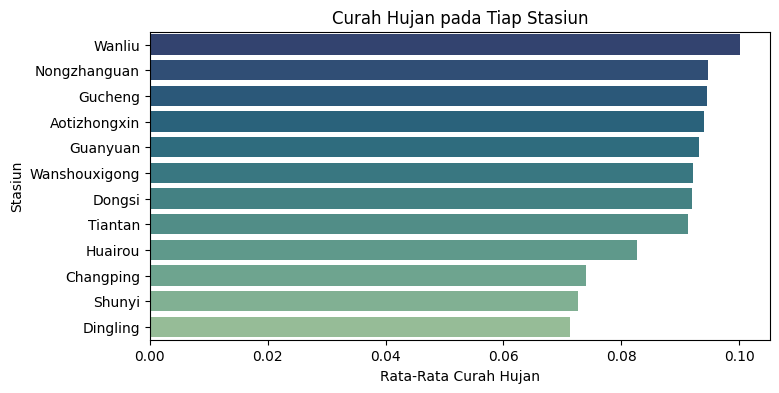

In [ ]:
# Visualization using Seaborn
plt.figure(figsize=(8, 4))
ax = sns.barplot(
    y=st_condition.index,
    x='RAIN',
    palette="crest_r",
    data=st_condition)
plt.ylabel('Stasiun')
plt.xlabel('Rata-Rata Curah Hujan')
plt.title('Curah Hujan pada Tiap Stasiun')
plt.show()


##Bagaimanakah keadaan curah hujan dalam 12 bulan terakhir pada stasiun dengan curah  hujan paling tinggi?

In [ ]:
#Stasiun dengan curah hujan tertinggi
rainest_station = st_condition.index[0]
rainest_station

'Wanliu'

In [ ]:
#Filter Main Dataframe
rainest_df = filtered_df[filtered_df["station"]==rainest_station].copy().reset_index(drop=True)
rainest_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,8.0,9.0,4.0,45.0,100.0,52.0,-3.4,1029.2,-18.5,0.0,NE,0.8,Wanliu,2016-02-29 00:00:00
1,12.0,14.0,4.0,49.0,100.0,47.0,-4.6,1029.1,-17.4,0.0,ENE,0.9,Wanliu,2016-02-29 01:00:00
2,11.0,14.0,5.0,41.0,100.0,56.0,-4.2,1029.2,-17.1,0.0,ENE,1.1,Wanliu,2016-02-29 02:00:00
3,14.0,14.0,5.0,45.0,100.0,51.0,-4.3,1029.0,-17.5,0.0,NE,0.9,Wanliu,2016-02-29 03:00:00
4,10.0,13.0,6.0,55.0,100.0,33.0,-6.0,1029.0,-14.5,0.0,NW,0.3,Wanliu,2016-02-29 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu,2017-02-28 19:00:00
7249,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu,2017-02-28 20:00:00
7250,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu,2017-02-28 21:00:00
7251,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu,2017-02-28 22:00:00


In [ ]:
#Mengubah datetime harian menjadi bulanan
monthly_rainest_df = rainest_df.groupby(rainest_df['datetime'].dt.to_period("M")).mean()

<ipython-input-28-21e3b95e3571>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_rainest_df = rainest_df.groupby(rainest_df['datetime'].dt.to_period("M")).mean()


In [ ]:
monthly_rainest_df

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
datetime,,,,,,,,,,,
2016-02,32.416667,37.875000,12.902570,65.750000,275.000000,39.958333,-0.950000,1027.454167,-16.562500,0.000000,1.729167
2016-03,38.365649,79.063639,9.743726,54.500984,654.588995,54.572560,9.305231,1017.693763,-10.904024,0.000000,2.028974
2016-04,55.884647,93.337298,9.279012,53.652711,696.206031,70.895091,16.331976,1006.570588,-0.288989,0.010256,1.860030
2016-05,49.268321,66.560410,7.906968,47.363265,618.367774,92.457873,20.845291,1004.063019,7.070360,0.061773,1.688089
2016-06,58.559644,75.352420,5.297856,48.136026,752.827697,101.775080,25.110986,999.201972,15.120986,0.090282,1.395915
2016-07,70.769530,79.858699,2.891190,42.495549,812.578912,85.488658,26.884253,999.148183,20.985734,0.500269,1.153836
2016-08,45.000513,57.675854,2.451615,42.982229,794.041294,72.800024,26.873414,1002.114575,19.429555,0.075304,1.107692
2016-09,53.747476,66.667029,3.383882,48.364226,793.822262,52.578265,21.407891,1008.128240,13.996675,0.119622,1.147888
2016-10,71.352549,89.280822,3.445483,58.326912,1062.488807,21.531542,12.610631,1016.040782,6.820349,0.116715,1.116424


In [ ]:
#Convert Period to Timestamp to String
filtered_month = monthly_rainest_df.index.to_timestamp()
filtered_month[0].strftime("%B %Y")

'February 2016'

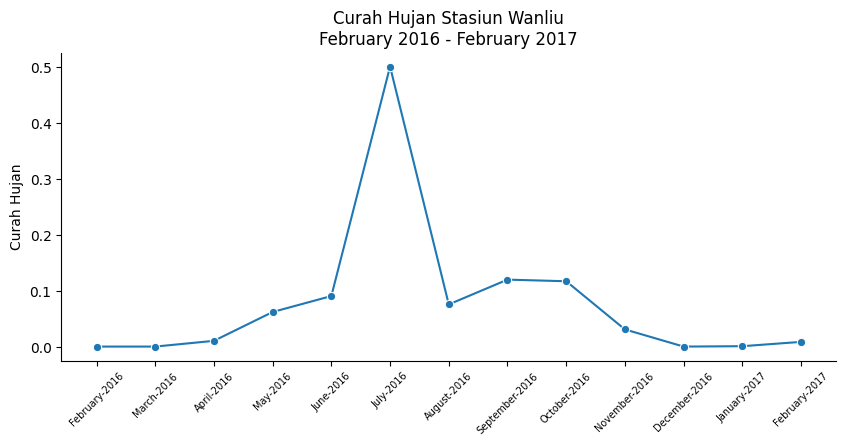

In [ ]:
plt.figure(figsize=(10, 4))
ax = sns.lineplot(
    y="RAIN",
    x=[x.strftime("%B-%Y") for x in filtered_month],
    # palette="crest_r",
    marker="o",
    data=monthly_rainest_df)
sns.despine(
)
plt.title(f'Curah Hujan Stasiun {rainest_station}\n{filtered_month[0].strftime("%B %Y")} - {filtered_month[-1].strftime("%B %Y")}')
plt.xticks(rotation=45,fontsize=7)
plt.ylabel("Curah Hujan")
plt.show()

##Bagaimana perbandingan tingkat polusi ketika hujan dan ketika tidak hujan dalam 12 bulan terakhir pada stasiun dengan curah hujan tertinggi?

In [ ]:
# Create Category
is_rain = []
for x in rainest_df["RAIN"]:
  if x != 0:
    is_rain.append("Rain")
  else:
    is_rain.append("Not Rain")

is_rain[0]

'Not Rain'

In [ ]:
rainest_df["is_rain"] = is_rain

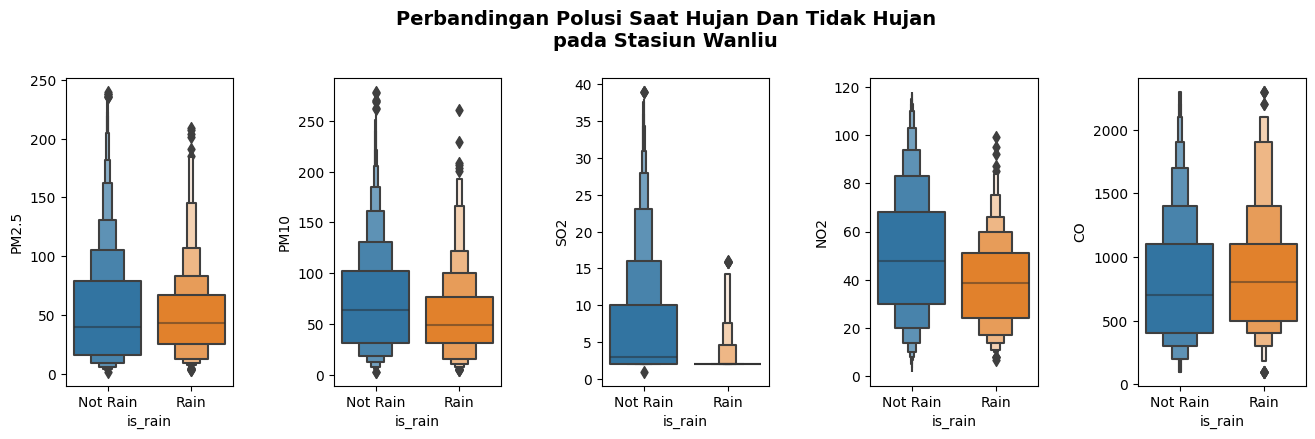

In [ ]:
fig,axes = plt.subplots(
    ncols=5,
    nrows=1,
    figsize=(16,4),

)
for x in range(len(axes)):

  axes[x]=sns.boxenplot(
      data=rainest_df,
      y=pollutant[x],
      x="is_rain",
      ax=axes[x],
  )

plt.subplots_adjust( hspace=0.3,wspace=.6)
plt.suptitle(f"Perbandingan Polusi Saat Hujan Dan Tidak Hujan\npada Stasiun {rainest_station}",
             fontsize=14,
             fontweight='bold',
             y=1.05)

plt.show()